### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

In [132]:
# set theaesthetic style of the plots
sns.set_style('darkgrid')
sns.color_palette("Paired", 9)
sns.set_palette("Paired")

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [15]:
data = pd.read_csv('data/coupons.csv')

In [16]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [46]:
# print the number of rows and columns
# for col in data.columns:
#     print(col, data[col].dtype)


#print unique values in each column which are not numeric
for col in data.columns:
    if data[col].dtype != 'int64':
        print(col, data[col].unique()) 


destination ['No Urgent Place' 'Home' 'Work']
passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather ['Sunny' 'Rainy' 'Snowy']
time ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration ['1d' '2h']
gender ['Female' 'Male']
age ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Constr

In [47]:
#print datatype of each column based on condition
for col in data.columns:
    if data[col].isnull().any():
        print(col, data[col].dtype)
        # data[col] = data[col].fillna('unknown')

car object
Bar object
CoffeeHouse object
CarryAway object
RestaurantLessThan20 object
Restaurant20To50 object


In [66]:
# # plot graph showing all columns with number of null values and show legend
fig = px.bar(data.isnull().sum())
fig.update_layout(title='Number of null values in each column', xaxis_title='Column', yaxis_title='Number of null values')
fig.show()


3. Decide what to do about your missing data -- drop, replace, other...

In [68]:
# Create a clone of the data which can be used for cleaning
cleaned_data = data.copy()

# update all the null values to 'unknown'
for col in cleaned_data.columns:
    if cleaned_data[col].isnull().any():
        cleaned_data[col] = cleaned_data[col].fillna('unknown')

# verify no null values are present visually
fig = px.bar(cleaned_data.isnull().sum())
fig.update_layout(title='Number of null values in each column', xaxis_title='Column', yaxis_title='Number of null values')
fig.show()



4. What proportion of the total observations chose to accept the coupon? 



In [50]:
# what proportion of the data has Y column as 1
print(cleaned_data['Y'].value_counts(normalize=True))

# Answer: 0.5684 or 56.84% of the data has Y column as 1

1    0.568433
0    0.431567
Name: Y, dtype: float64


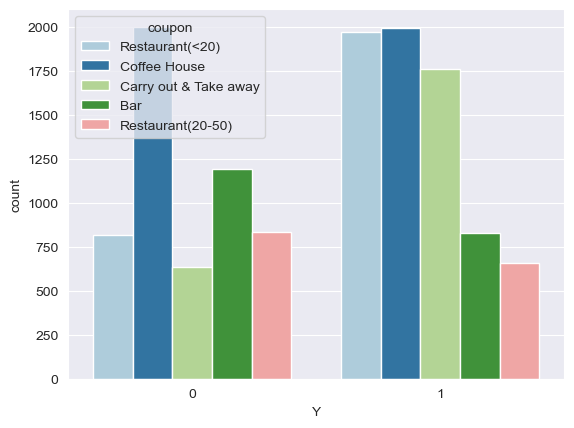

In [143]:
# visualize proportion of Y column with coupon column with seaborn
sns.countplot(x='Y', hue='coupon', data=cleaned_data)
plt.show()



5. Use a bar plot to visualize the `coupon` column.

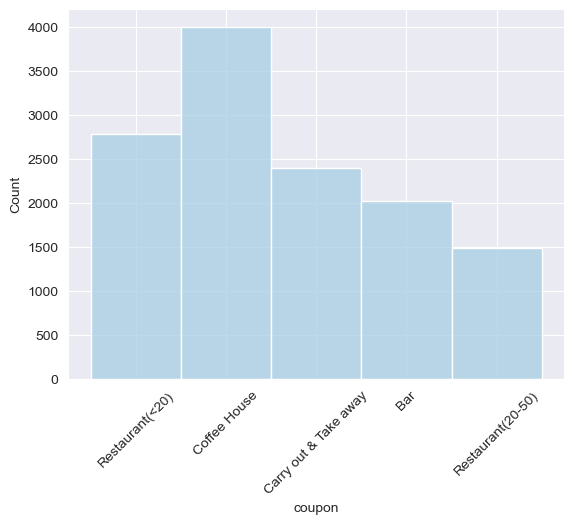

In [133]:
# visualize the distribution of Y column using a histogram plot with seaborn with legend and x-axis label tilted at 45 degrees
sns.histplot(cleaned_data, x='coupon', legend=True)
plt.xticks(rotation=45)
plt.show()



(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

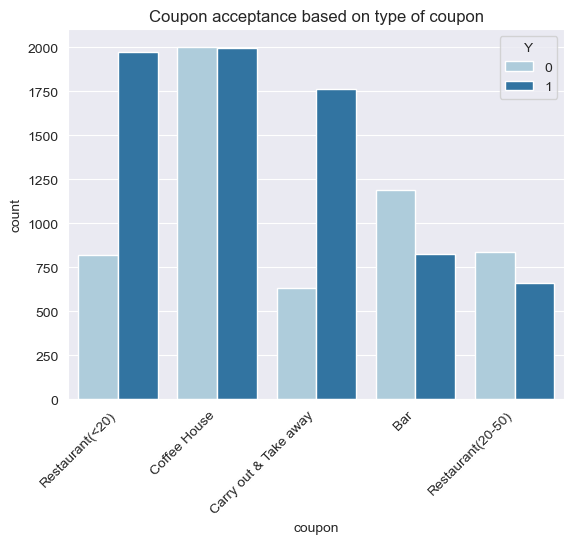

In [134]:
# visualize the distribution of Y column using a histogram plot with seaborn with legend and x-axis label tilted at 45 degrees
sns.countplot(data=cleaned_data, x='coupon', hue='Y')
plt.title('Coupon acceptance based on type of coupon')
plt.xticks(rotation=45, horizontalalignment='right')


6. Use a histogram to visualize the temperature column.

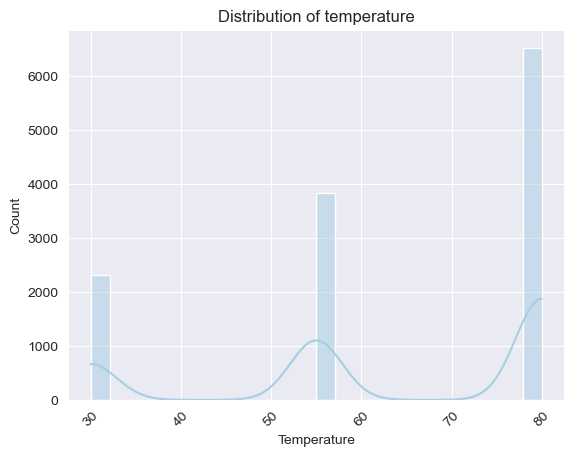

In [135]:
# plot a histogram to show temperature column in data with legend and x-axis label tilted at 45 degrees with title and x-axis and y-axis labels
sns.histplot(cleaned_data, x='temperature', kde=True, legend=True)
plt.xticks(rotation=45)
plt.title('Distribution of temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()


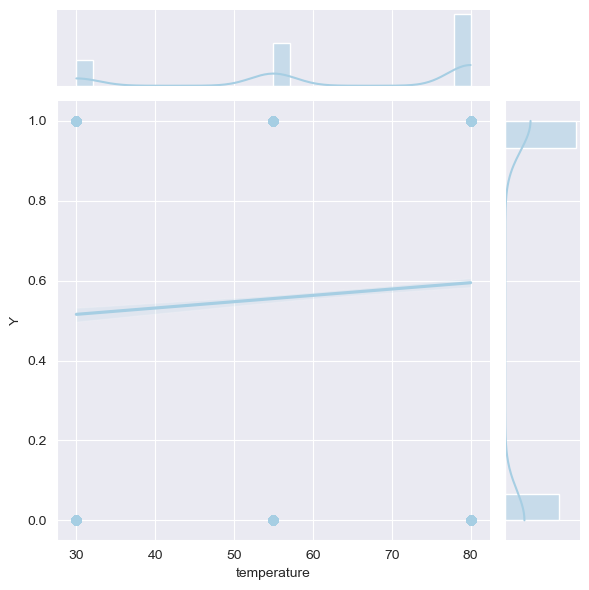

In [136]:
# create a joint plot to show the relationship between temperature and Y column
sns.jointplot(data=cleaned_data, x='temperature', y='Y', kind='reg')
plt.show()

# answer: There is a positive correlation between temperature and Y column, meaning more the temperature, more the number of people who will buy the coupon

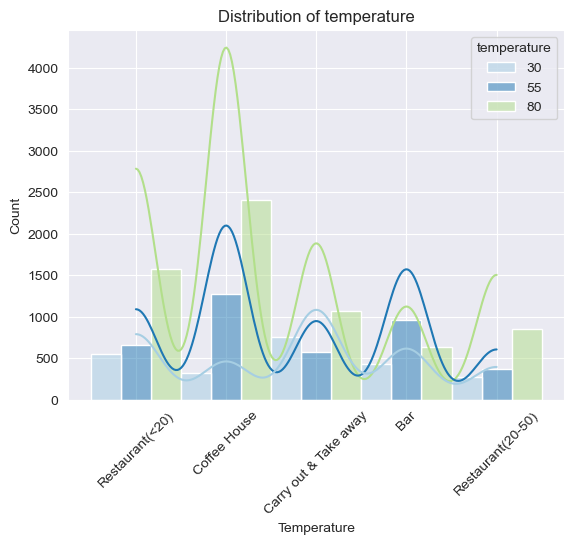

In [277]:
# create histogram to show the distribution of temperature column v/s coupon with legend and x-axis label tilted at 45 degrees with title and x-axis and y-axis labels and group next to each other
sns.histplot(cleaned_data, x='coupon', hue='temperature', kde=True, legend=True, multiple="dodge", palette="Paired")
plt.xticks(rotation=45)
plt.title('Distribution of temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [284]:
# create data frame with only data which has coupon column as 'Bar'
bar_data = cleaned_data[cleaned_data['coupon'] == 'Bar']
# drop rows with unknown values in Bar column
# bar_data = bar_data[bar_data['Bar'] != 'unknown']
bar_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


0    0.589985
1    0.410015
Name: Y, dtype: float64


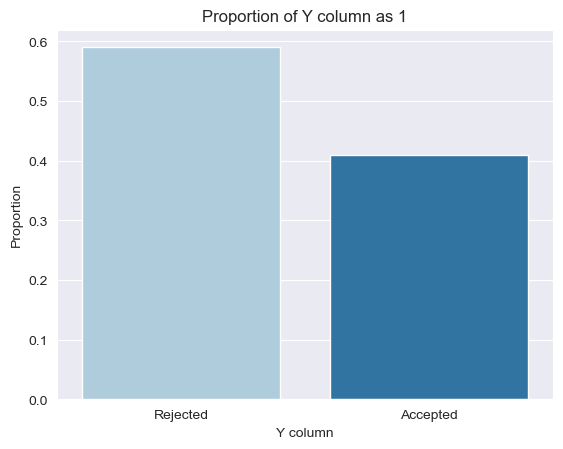

In [285]:
# what proportion of the data has Y column as 1
print(bar_data['Y'].value_counts(normalize=True))

#print bar chart for list of values update x axis lable and title in seaborn
sns.barplot(x=bar_data['Y'].value_counts(normalize=True).index, y=bar_data['Y'].value_counts(normalize=True).values)
plt.title('Proportion of Y column as 1')
plt.xlabel('Y column')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Rejected', 'Accepted'])
plt.show()

# Answer: 0.4103 or 41.03% of the data has Y column as 1
# which means around 41% of the people accepted the coupon "Bar"

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [286]:
# create a new column 'bar_category' with :
# (1) value 1 if the bar value is one of the following: 'never', 'less1', '1~3'
# (2) value 2 if the bar value is one of the following: 'gt8', '4~8'
# (3) value 0 if the bar value is 'unknown'
bar_data['bar_category'] = np.where(bar_data['Bar'].isin(['never', 'less1', '1~3']), 1, 0)
bar_data['bar_category'] = np.where(bar_data['Bar'].isin(['gt8', '4~8']), 2, bar_data['bar_category'])
bar_data['bar_category'] = np.where(bar_data['Bar'].isin(['unknown']), 0, bar_data['bar_category'])
print(bar_data['bar_category'].value_counts())

# drop columns where bar_category is 0
# bar_data = bar_data[bar_data['bar_category'] != 0]
bar_data

1    1797
2     199
0      21
Name: bar_category, dtype: int64


/var/folders/ws/wd43l54n24n975gdg0gfpw080000gp/T/ipykernel_1988/3079120988.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ws/wd43l54n24n975gdg0gfpw080000gp/T/ipykernel_1988/3079120988.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ws/wd43l54n24n975gdg0gfpw080000gp/T/ipykernel_1988/3079120988.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,bar_category
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,unknown,4~8,1~3,1,1,0,0,1,0,1
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,unknown,4~8,1~3,1,0,0,1,0,1,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,unknown,4~8,1~3,1,1,1,0,1,0,1
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,1
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,1
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,1
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,1


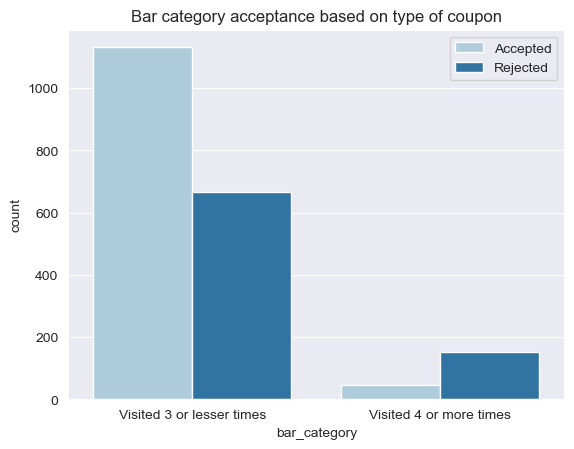

In [290]:
# plot bar graph to show bar_values column only excludes rows with value 0 with Y column with legend and x-axis label tilted at 45 degrees with title and x-axis and y-axis labels
# and title is 'Bar category acceptance based on type of coupon'
# update Y column values to 'Accepted' and 'Rejected' instead of 1 and 0 in the legend
# update x axis labels to 'Never had a bar', 'Had less than 1 bar', 'Had more than 1 bar'
sns.countplot(data=bar_data[bar_data['bar_category'] != 0], x='bar_category', hue='Y')
plt.title('Bar category acceptance based on type of coupon')
plt.xticks([0, 1], ['Visited 3 or lesser times', 'Visited 4 or more times'])
plt.legend(['Accepted', 'Rejected'])
plt.show()

# Answer: The bar category with value 1 has a higher acceptance rate than the bar category with value 2
# this means that people who have never had a bar or have had less than 1 bar are more likely to buy the coupon than people who have had more than 1 bar

In [291]:
# bar_category == 2 are the rows for which people have visited 1 or more bars
# hence we will only consider these rows for the next part and try to find out if there is a relationship between the number of bars visited and the acceptance rate of the coupon
print(" 3 or less visits :")
print(bar_data.query('bar_category == 1')["Y"].value_counts(normalize=True).sort_index())
print("4 or more visits :")
print(bar_data.query('bar_category == 2')["Y"].value_counts(normalize=True).sort_index())

 3 or less visits :
0    0.629382
1    0.370618
Name: Y, dtype: float64
4 or more visits :
0    0.231156
1    0.768844
Name: Y, dtype: float64


In [340]:
# based on above values, we pick index with value 1 for both the above data frames because this represents coupon acceptance
# print bar chart for list of values update x axis lable and title in plotly
fig = px.bar(y=[
                bar_data.query('bar_category == 1')["Y"].value_counts(normalize=True).sort_index().values[1],
                bar_data.query('bar_category == 2')["Y"].value_counts(normalize=True).sort_index().values[1]
                ])
fig.update_layout(title_text='Acceptance of coupon based on bar visits', xaxis_title='Y column', yaxis_title='Proportion')
fig.update_xaxes(tickvals = [0, 1], ticktext=['3 or less visits', '4 or more visits'])
fig.show()

# Answer: The acceptance rate of the coupon is higher for people who have visited 4 or more bars (by 76.88%) than people who have visited 3 or less bars (by 37.06%)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [293]:
# create column 'bar_visited' with
# (1)  value 1 if bar value is one of the following: 'never', 'less1'
# (2)  value 2 if bar value is one of the following: '1~3', '4~8', 'gt8'
# (3)  value 0 if bar value is 'unknown'
bar_data['bar_visited'] = np.where(bar_data['Bar'].isin(['never', 'less1']), 1, 0)
bar_data['bar_visited'] = np.where(bar_data['Bar'].isin(['1~3', '4~8', 'gt8']), 2, bar_data['bar_visited'])
bar_data['bar_visited'] = np.where(bar_data['Bar'].isin(['unknown']), 0, bar_data['bar_visited'])
bar_data['bar_visited'].value_counts()


/var/folders/ws/wd43l54n24n975gdg0gfpw080000gp/T/ipykernel_1988/4085714515.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ws/wd43l54n24n975gdg0gfpw080000gp/T/ipykernel_1988/4085714515.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ws/wd43l54n24n975gdg0gfpw080000gp/T/ipykernel_1988/4085714515.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

1    1400
2     596
0      21
Name: bar_visited, dtype: int64

In [299]:
print(bar_data['age'].value_counts())


21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: age, dtype: int64


In [301]:
# validate drivers over the age of 25
# create a new column 'age_category' with :
# (1) value 1 if the age value is one of the following: 'below21', '21'
# (2) value 2 if the age value is one of the following: '26', '31', '36', '41', '46', '50plus'
# (3) value 0 if the age value is 'unknown'
bar_data['age_category'] = np.where(bar_data['age'].isin(['below21', '21']), 1, 0)
bar_data['age_category'] = np.where(bar_data['age'].isin(['26', '31', '36', '41', '46', '50plus']), 2, bar_data['age_category'])
bar_data['age_category'] = np.where(bar_data['age'].isin(['unknown']), 0, bar_data['age_category'])
print(bar_data['age_category'].value_counts())

2    1513
1     504
Name: age_category, dtype: int64


/var/folders/ws/wd43l54n24n975gdg0gfpw080000gp/T/ipykernel_1988/2258719950.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ws/wd43l54n24n975gdg0gfpw080000gp/T/ipykernel_1988/2258719950.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ws/wd43l54n24n975gdg0gfpw080000gp/T/ipykernel_1988/2258719950.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [309]:
# find proportion of people who accepted the coupon for each age category and bar_visited=2
print("Bar visited 1 or more + age > 25 :")
print(bar_data.query('bar_visited == 2 and age_category==2')["Y"].value_counts(normalize=True).sort_index())
print("Bar visited less than 1 + age < 25 :")
print(bar_data.query('bar_visited == 1 and age_category==1')["Y"].value_counts(normalize=True).sort_index())

Bar visited 1 or more + age > 25 :
0    0.304762
1    0.695238
Name: Y, dtype: float64
Bar visited less than 1 + age < 25 :
0    0.605505
1    0.394495
Name: Y, dtype: float64


In [324]:
# # plot multi bar graph to show bar_values column only excludes rows with value 0 with Y column with legend and x-axis label tilted at 45 degrees with title and x-axis and y-axis labels
# # and title is 'Bar category acceptance based on type of coupon'
# # update Y column values to 'Accepted' and 'Rejected' instead of 1 and 0 in the legend
# # update x axis labels to 'Never had a bar', 'Had less than 1 bar', 'Had more than 1 bar'
# based on above values, we pick index with value 1 for both the above data frames because this represents coupon acceptance
# print bar chart for list of values update x axis lable and title in seaborn

fig = px.bar(y=bar_data.query('bar_visited == 2 and age_category==2')["Y"].value_counts(normalize=True).sort_index().values)
fig.update_layout(title_text='Aged greater than 25 and visits bar greater than 1 time', xaxis_title='Y column', yaxis_title='Proportion')
fig.update_xaxes(tickvals = [0, 1], ticktext=['Rejected', 'Accepted'])
fig.show()

fig = px.bar(y=bar_data.query('bar_visited == 1 and age_category==1')["Y"].value_counts(normalize=True).sort_index().values)
fig.update_layout(title_text='Aged less than 25 and visits bar less than 1 time', xaxis_title='Y column', yaxis_title='Proportion')
fig.update_xaxes(tickvals = [0, 1], ticktext=['Rejected', 'Accepted'])
fig.show()


# Answer: From below graph it is clear that people who are aged 25+ and have visited a bar are more likely to accept the coupon than people who are aged less than 25 and have never visited a bar    

In [325]:
bar_data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y', 'bar_category', 'bar_visited',
       'age_category'],
      dtype='object')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [338]:
# create a new column 'bar_question_5' with :
# (1) value 1 if bar_visited value is 1 and 'passanger' value is not one of the following: 'Kid(s) and Alone'
#  and 'occupation' is not Farming Fishing & Forestry
# (2) value 0 otherwise
bar_data['bar_question_5'] = np.where(
                                (bar_data['bar_visited'] == 1) &
                                (bar_data['passanger'].isin(['Kid(s) and Alone']) == False) &
                                (bar_data['occupation'].isin(['Farming Fishing & Forestry']) == False), 1, 0)
bar_data['bar_question_5'].value_counts()



/var/folders/ws/wd43l54n24n975gdg0gfpw080000gp/T/ipykernel_1988/3383593562.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1    1391
0     626
Name: bar_question_5, dtype: int64

In [356]:
# what proportion of the data has Y column as 1
print(bar_data['bar_question_5'].value_counts(normalize=True))

#print bar chart for list of values update x axis lable and title in seaborn

fig = px.bar(y=bar_data.query('bar_question_5==1')["Y"].value_counts(normalize=True).sort_index().values)
fig.update_layout(title_text='Drivers : bars>1 & passengers not in [kid, alone] & occupations != "farming fishing or forestry"', xaxis_title='Y column', yaxis_title='Proportion')
fig.update_xaxes(tickvals = [0, 1], ticktext=['Rejected', 'Accepted'])
fig.show()

fig = px.bar(y=bar_data.query('bar_question_5!=1')["Y"].value_counts(normalize=True).sort_index().values)
fig.update_layout(title_text='Drivers not in : bars>1 & passengers not in [kid, alone] & occupations != "farming fishing or forestry"', xaxis_title='Y column', yaxis_title='Proportion')
fig.update_xaxes(tickvals = [0, 1], ticktext=['Rejected', 'Accepted'])
fig.show()

#Answer : drivers who have visited a bar more than once and are not alone with kids and are not in farming fishing or forestry occupation are less likely to accept the coupon than drivers who do not meet the above criteria


1    0.689638
0    0.310362
Name: bar_question_5, dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  